In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

xAPI-Edu-Data.csv



In [2]:
df1=pd.read_csv('../input/xAPI-Edu-Data.csv')
df=pd.read_csv('../input/xAPI-Edu-Data.csv')

In [3]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


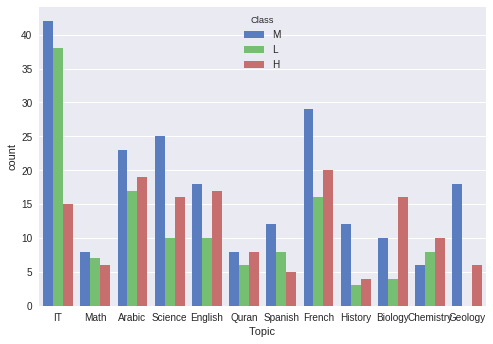

In [4]:
sns.countplot(x='Topic',hue='Class',data=df1,palette="muted")

In [5]:
df1=pd.read_csv('../input/xAPI-Edu-Data.csv')
df.head(4)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L


In [6]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

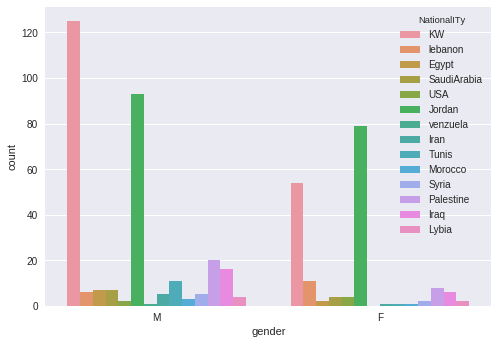

In [7]:
sns.countplot(x='gender',data=df,hue='NationalITy')

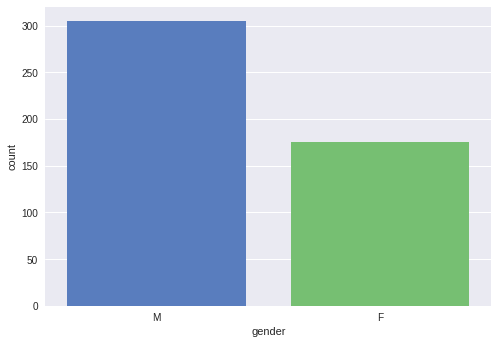

In [8]:
sns.countplot(x='gender',data=df,palette="muted")

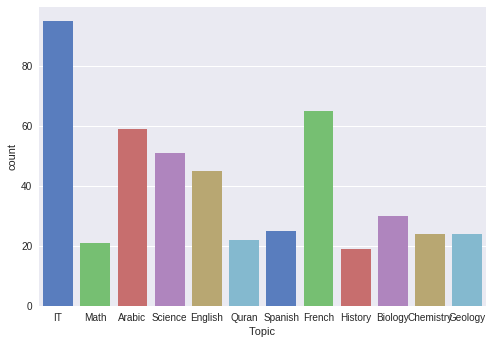

In [9]:
sns.countplot(x="Topic", data=df, palette="muted");

In [10]:
df.head(4)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L


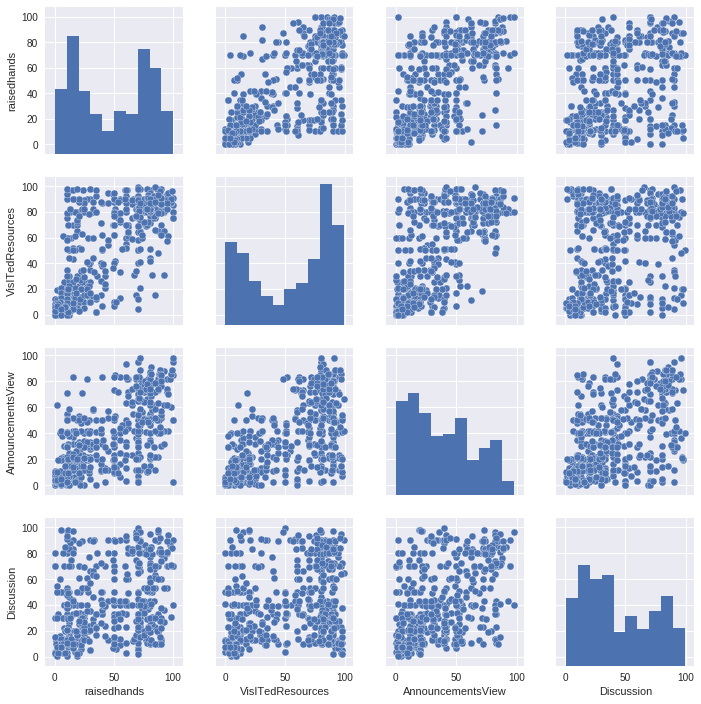

In [11]:
sns.pairplot(data=df)

In [12]:
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [13]:
columns=df.dtypes[df.dtypes=='object'].index
columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.columns:
    df[col]=encoder.fit_transform(df[col])
    

df.head(3) 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,18,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,23,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,28,0,0,0,1


In [15]:
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,18,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,23,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,28,0,0,0,1


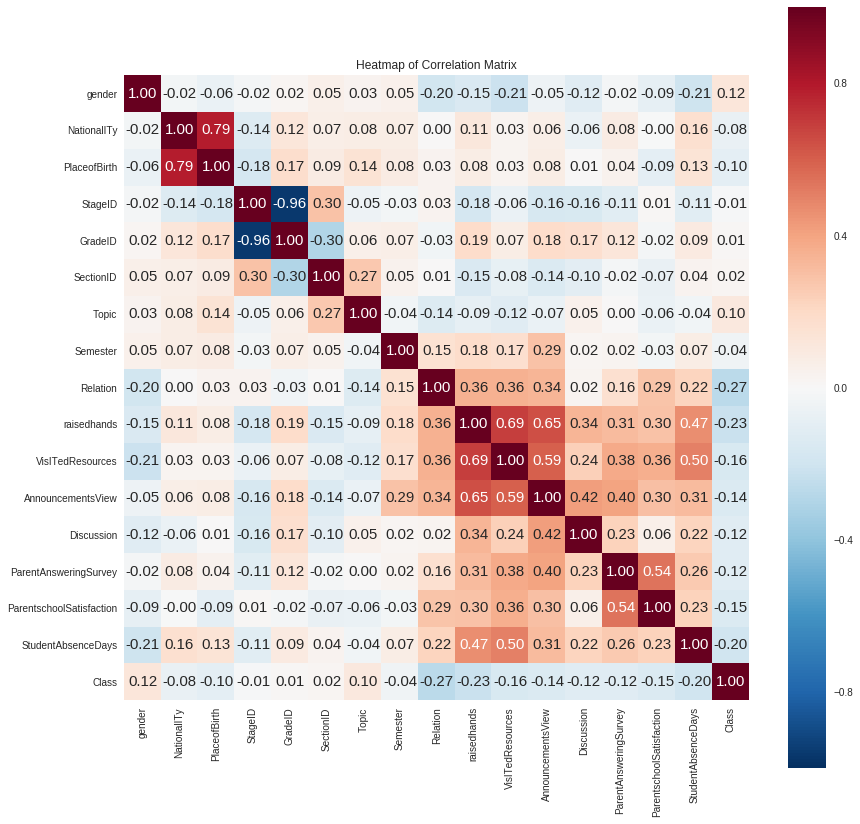

In [16]:
##Co-relation
corr=df.corr()
corr = (corr)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')


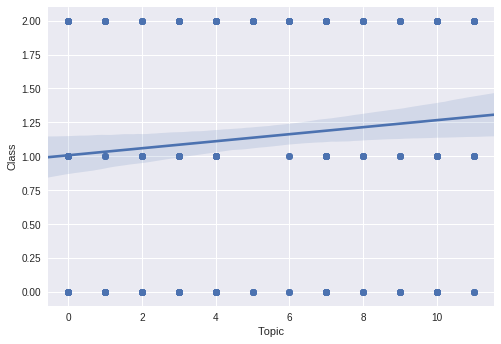

In [17]:
sns.regplot(x='Topic',y='Class',data=df)

In [18]:
Y=df['Class']
df=df.drop(['Class'],axis=1)
X=df

In [19]:
X.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,18,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,23,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,28,0,0,0


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, 
random_state = 30)


In [21]:
#PCA
#Principle component analysis
from sklearn.decomposition import PCA
pca = PCA()
pa=pca.fit_transform(X)
pa

array([[  5.63061397e+01,  -4.62993998e+00,   3.64883135e+00, ...,
         -5.70748053e-01,  -9.43114772e-02,   2.57192083e-01],
       [  4.92207489e+01,  -2.53387177e+00,   6.38782800e+00, ...,
         -5.38613692e-01,  -8.50427262e-02,   2.54982549e-01],
       [  6.21423720e+01,   8.63006096e+00,   4.07563423e+00, ...,
         -1.29468742e-01,  -1.31459003e-01,   2.09821194e-01],
       ..., 
       [ -1.84872127e+00,  -1.89234986e+01,   1.22081263e+01, ...,
          4.31869775e-02,  -3.81789160e-02,   1.27195188e-01],
       [  3.20530523e+01,   2.25336086e+01,   4.82770652e+00, ...,
          4.97995478e-01,  -7.42024500e-02,   1.35419684e-01],
       [  2.60644938e+01,   2.87175108e+01,  -2.22512608e+00, ...,
          6.01025853e-01,  -1.83829191e-02,   9.02019348e-02]])

In [22]:
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
explained_variance

array([  1.62209365e+03,   5.14594309e+02,   2.46903793e+02,
         1.81677905e+02,   1.30334541e+01,   9.84715629e+00,
         5.79076987e+00,   1.33346953e+00,   3.17471443e-01,
         3.08639407e-01,   2.39224923e-01,   2.09424830e-01,
         1.65546085e-01,   1.48160032e-01,   9.75294393e-02,
         2.46072603e-02])

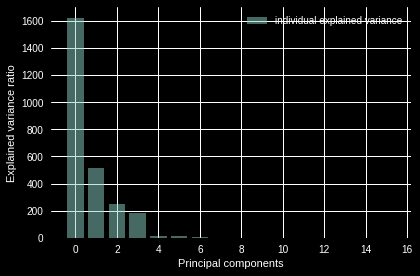

In [23]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(16), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

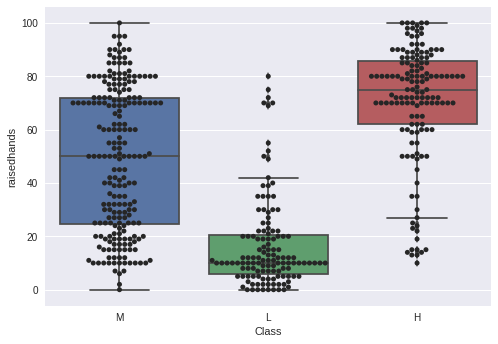

In [24]:
Raised_hand = sns.boxplot(x="Class", y="raisedhands", data=df1)
Raised_hand = sns.swarmplot(x="Class", y="raisedhands", data=df1, color=".15")
plt.show()

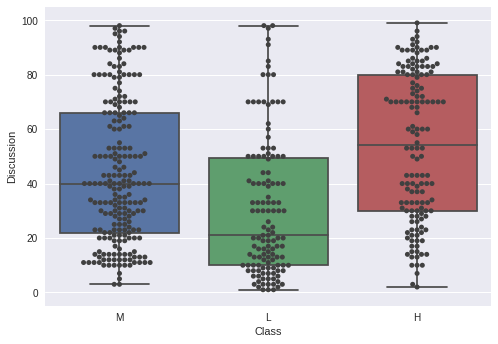

In [25]:
ax = sns.boxplot(x="Class", y="Discussion", data=df1)
ax = sns.swarmplot(x="Class", y="Discussion", data=df1, color=".25")
plt.show()

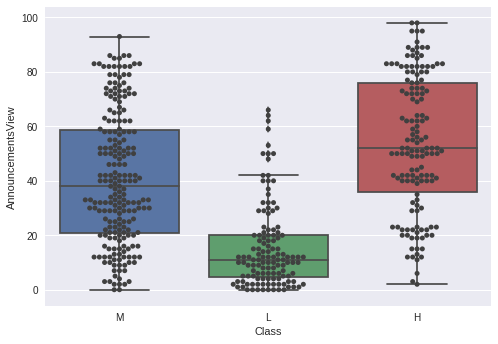

In [26]:
Anounce_bp = sns.boxplot(x="Class", y="AnnouncementsView", data=df1)
Anounce_bp = sns.swarmplot(x="Class", y="AnnouncementsView", data=df1, color=".25")
plt.show() 

In [27]:
X_train.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
350,1,0,0,2,0,1,4,0,1,5,13,6,5,0,1,0
238,0,4,4,1,4,1,10,1,1,56,69,56,59,1,1,0
443,1,3,3,1,5,0,6,1,1,54,65,62,62,1,1,0


In [28]:
from sklearn.preprocessing import scale

X_train=scale(X_train)
X_test=scale(X_test)


In [29]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, Y_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [30]:
y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (Y_test != y_pred).sum())

Misclassified samples: 21


In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.56


In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.22      0.14      0.17        14
          1       0.92      0.80      0.86        15
          2       0.50      0.68      0.58        19

avg / total       0.55      0.56      0.55        48



In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train, Y_train)



SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred_SVM = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred_SVM))
print('Misclassified samples: %d' % (Y_test != y_pred_SVM).sum())

Accuracy: 0.73
Misclassified samples: 13


In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
#clf = MLPClassifier(solver='lbfgs',alpha=1e-5,random_state=1)
clf = MLPClassifier(solver='lbfgs',alpha=.1,random_state=1)
clf.fit(X_train, Y_train)
scores=cross_val_score(clf,X_test,Y_test,cv=10)

In [36]:
clf.score(X_test,Y_test)

0.75

In [37]:
RF = RandomForestClassifier(n_jobs = -1)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
RF.score(X_test,Y_test)
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())

Misclassified samples: 15


In [38]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb.fit(X_train, Y_train)
xgb.predict(X_test)
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())

Misclassified samples: 15


In [39]:
xgb_pred=xgb.predict(X_test)

In [40]:
print (classification_report(Y_test,xgb_pred))

             precision    recall  f1-score   support

          0       0.69      0.64      0.67        14
          1       0.85      0.73      0.79        15
          2       0.59      0.68      0.63        19

avg / total       0.70      0.69      0.69        48



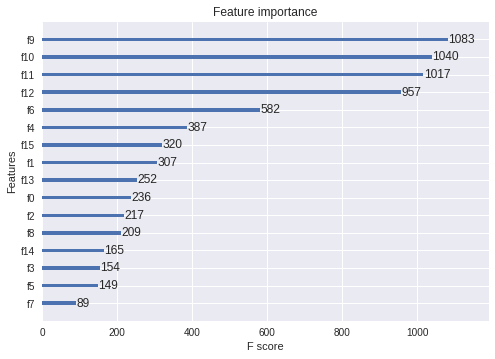

In [41]:
plot_importance(xgb)